# S Based Unprocessed Data Viz.
In this notebook, we try to visualize how the intensity values change for different values of maternal and fetal saturation + Hb concentration. 

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
DATA_PATH =  Path(r"/home/rraiyan/simulations/tfo_sim/data/compiled_intensity/pencil2_ext.pkl")
data = pd.read_pickle(DATA_PATH)
data["Intensity"] = np.log10(data["Intensity"])     # Take log of intensity
data.head()

,Wave Int,SDD,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation,Intensity
0,2.0,10,5.0,14.0,11.0,0.9,11.0,0.2,6.281186
1,2.0,15,5.0,14.0,11.0,0.9,11.0,0.2,5.318575
2,2.0,19,5.0,14.0,11.0,0.9,11.0,0.2,4.580523
3,2.0,24,5.0,14.0,11.0,0.9,11.0,0.2,3.724486
4,2.0,28,5.0,14.0,11.0,0.9,11.0,0.2,2.983096


In [3]:
data.groupby('Wave Int')["Maternal Wall Thickness"].value_counts()

Wave Int  Maternal Wall Thickness
1.0       4.0                        748440
          5.0                        748440
          16.0                       748440
          25.0                       748440
          24.0                       748440
                                      ...  
3.0       18.0                       748440
          17.0                       748440
          16.0                       748440
          15.0                       748440
          34.0                       748440
Name: count, Length: 93, dtype: int64

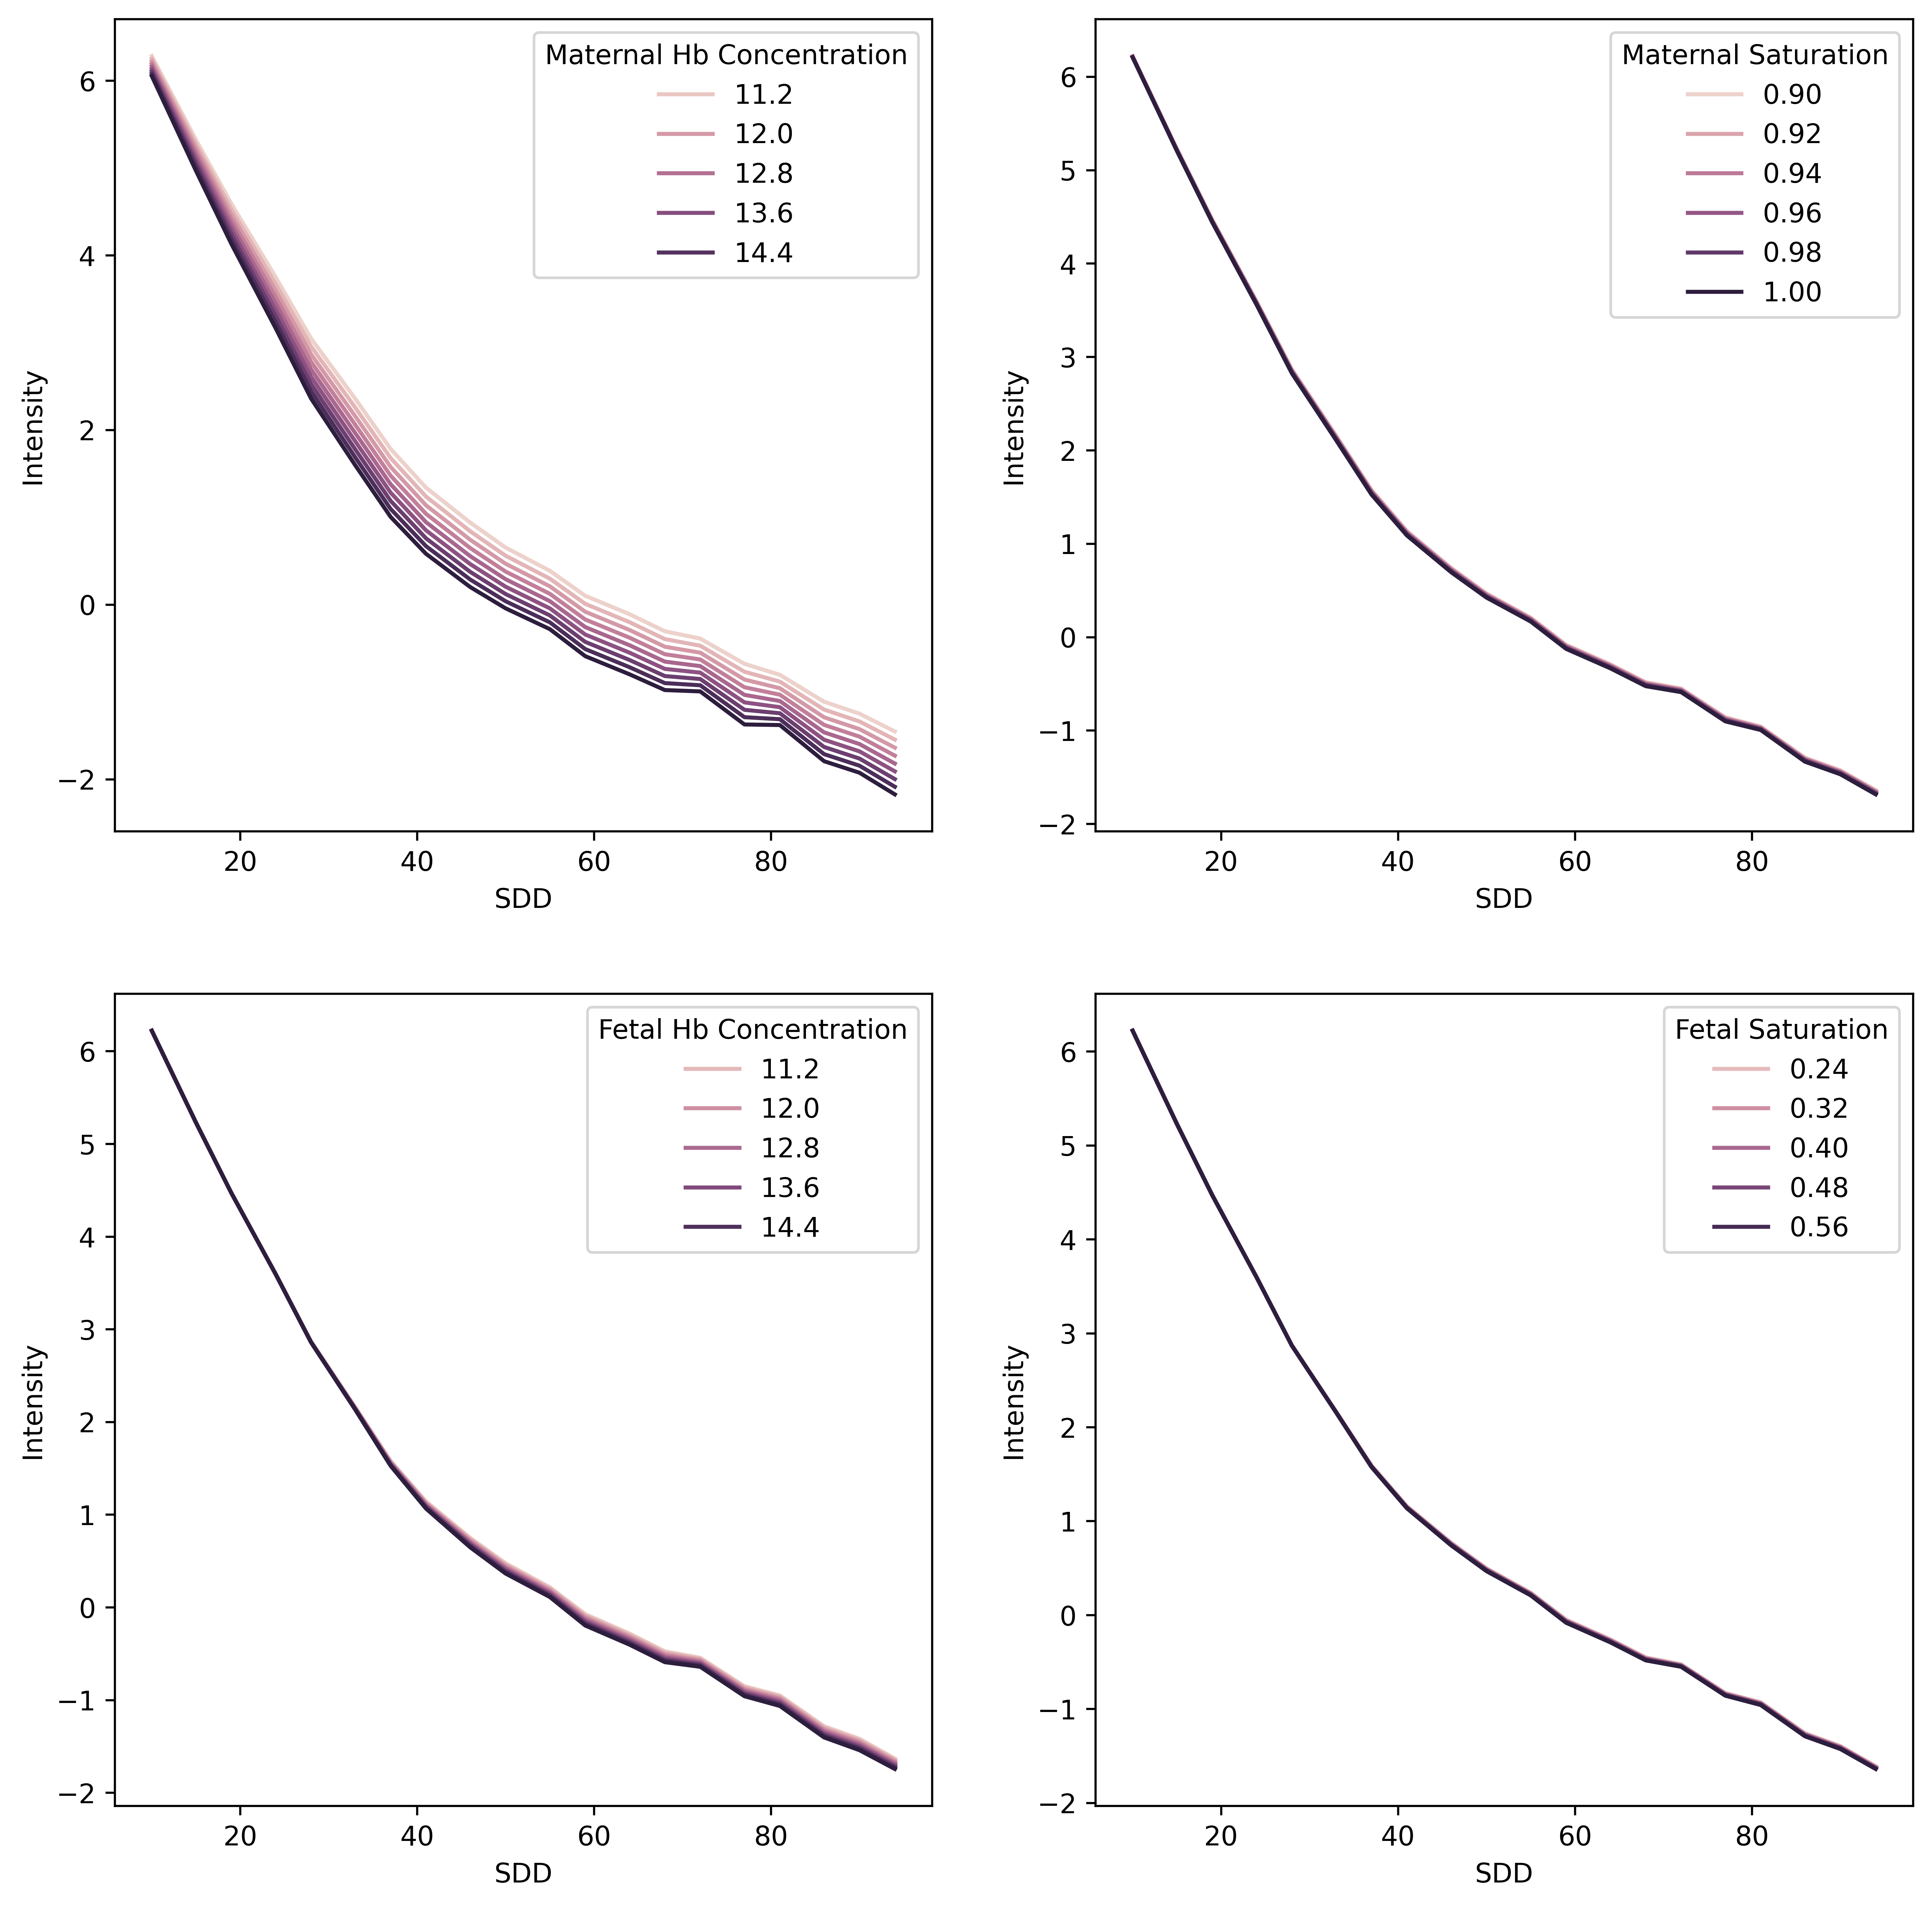

In [4]:
THICKNESS = 12.0
WAVE_INT = 2
MATERNAL_CONCENTRATION = 12.
FETAL_CONCENTRATION = 11,
MATERNAL_SATURATION = 0.9
FETAL_SATURATION = 0.6


data = data[data["Wave Int"] == WAVE_INT]

filtered_data1 = data[(data['Maternal Saturation']==MATERNAL_SATURATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data2 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data3 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Maternal Saturation']==MATERNAL_SATURATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data4 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Hb Concentration"]==FETAL_CONCENTRATION) & (data['Maternal Saturation']==MATERNAL_SATURATION) & (data['Maternal Wall Thickness']==THICKNESS)]

plt.figure(figsize=(12, 12), dpi=600)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_data1, x='SDD', y='Intensity', hue='Maternal Hb Concentration', markers=True)
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_data2, x='SDD', y='Intensity', hue='Maternal Saturation', markers=True)
plt.subplot(2, 2, 3)
sns.lineplot(data=filtered_data3, x='SDD', y='Intensity', hue='Fetal Hb Concentration', markers=True)
plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_data4, x='SDD', y='Intensity', hue='Fetal Saturation', markers=True)

plt.show()

## SNR Data

In [5]:
from pathlib  import Path
SNR_FILEPATH = Path('../data/snr/snr1.pkl')

snr_data = pd.read_pickle(SNR_FILEPATH)
snr_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/snr/snr1.pkl'

In [ ]:
snr_data.describe()

,SDD,SNR,Fetal SNR,Wave Int,Uterus Thickness,Maternal Wall Thickness
count,760.000000,7.600000e+02,7.600000e+02,760.000000,760.0,760.000000
mean,52.500000,3.720334e+06,8.796507e+05,1.500000,5.0,20.000000
std,25.944859,7.628531e+06,1.321314e+06,0.500329,0.0,10.961665
min,10.000000,7.592600e+04,7.592600e+04,1.000000,5.0,2.000000
25%,31.000000,3.280840e+05,2.636055e+05,1.000000,5.0,10.000000
50%,52.500000,8.619170e+05,4.401505e+05,1.500000,5.0,20.000000
75%,74.000000,3.006638e+06,8.993098e+05,2.000000,5.0,30.000000
max,95.000000,3.484443e+07,1.209440e+07,2.000000,5.0,38.000000
